# Course 3 Project

Loading libraries

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from geopy.distance import great_circle

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_squared_error
from math import sqrt

import warnings
warnings.filterwarnings('ignore')

Loading data

In [ ]:
# extracting dataset from the zip file

!unzip "/content/nyc_taxi_trip_duration Dataset.zip" -d "/content/"

Archive:  /content/nyc_taxi_trip_duration Dataset.zip
  inflating: /content/nyc_taxi_trip_duration Dataset.csv  


In [ ]:
# loading dataset

df = pd.read_csv('/content/nyc_taxi_trip_duration Dataset.csv')

## Exploratory Data Analysis and Feature Engineering

Dataset description:

1. **id** - a unique identifier for each trip

2. **vendor_id** - a code indicating the provider associated with the trip record

3. **pickup_datetime** - date and time when the meter was engaged

4. **dropoff_datetime** - date and time when the meter was disengaged

5. **passenger_count** - the number of passengers in the vehicle (driver entered value)

6. **pickup_longitude** - the longitude where the meter was engaged

7. **pickup_latitude** - the latitude where the meter was engaged

8. **dropoff_longitude** - the longitude where the meter was disengaged

9. **dropoff_latitude** - the latitude where the meter was disengaged

10. **store_and_fwd_flag** - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server (Y=store and forward; N=not a store and forward trip)

11. **trip_duration** - (target) duration of the trip in seconds

Understanding the contents of the dataset

In [ ]:
print("No. of rows: ", df.shape[0])
print("No. of columns: ", df.shape[1])

No. of rows:  729322
No. of columns:  11


In [ ]:
# printing the first five rows
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [ ]:
# printing the last five rows
df.tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
729317,id3905982,2,2016-05-21 13:29:38,2016-05-21 13:34:34,2,-73.965919,40.789780,-73.952637,40.789181,N,296
729318,id0102861,1,2016-02-22 00:43:11,2016-02-22 00:48:26,1,-73.996666,40.737434,-74.001320,40.731911,N,315
729319,id0439699,1,2016-04-15 18:56:48,2016-04-15 19:08:01,1,-73.997849,40.761696,-74.001488,40.741207,N,673
729320,id2078912,1,2016-06-19 09:50:47,2016-06-19 09:58:14,1,-74.006706,40.708244,-74.013550,40.713814,N,447
729321,id1053441,2,2016-01-01 17:24:16,2016-01-01 17:44:40,4,-74.003342,40.743839,-73.945847,40.712841,N,1224


Missing values

In [ ]:
# checking for the missing values

print("No. of missing values in each columns: \n")
print(df.isnull().sum())

No. of missing values in each columns: 

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64


There are no missing values present in any of the columns

Duplicated records

In [ ]:
# checking for the duplicate records
print("No. of duplicate records: ", df.duplicated().sum())

No. of duplicate records:  0


There are no duplicate records present in the dataset

Checking unique values of all columns

In [ ]:
df.nunique()

id                    729322
vendor_id                  2
pickup_datetime       709359
dropoff_datetime      709308
passenger_count            9
pickup_longitude       19729
pickup_latitude        39776
dropoff_longitude      27892
dropoff_latitude       53579
store_and_fwd_flag         2
trip_duration           6296
dtype: int64

The id data contains 729322 unique values, which is the exact number of rows the dataset has.

Datatypes of the features

In [ ]:
# checking the datatype of all features in the dataset

df.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

**categorical variables:**

id, pickup_datetime, dropoff_datetime, store_and_fwd_flag

**continuous variables:**

vendor_id, passenger_count, pickup_longitude, pickup_latitude dropoff_longitude, dropoff_latitude

**target variable:** trip_duratation

trip_duration is a continuos variable, which determines that the problem is a regression problem.


understanding categorical variable

Now, we will dive into each variable one by one.

Starting off with id variable, since it is unique for every record, this feature is not important for the model.

feature - store_and_fwd_flag

In [ ]:
# checking the value count
df['store_and_fwd_flag'].value_counts()

N    725282
Y      4040
Name: store_and_fwd_flag, dtype: int64

This variable contains Yes and No values only. This can be converted to numeric datatype using the label encoder

The LabelEncoder() from sklearn.preprocessing will map N to 0 and Y to 1.

In [ ]:
# label_encoder object
label_encoder = LabelEncoder()

# Encode labels in column 'Discount'.
df['store_and_fwd_flag_encoded']= label_encoder.fit_transform(df['store_and_fwd_flag'])
df['store_and_fwd_flag_encoded']= label_encoder.fit_transform(df['store_and_fwd_flag'])

feature - pickup_datetime, dropoff_datetime

In [ ]:
# checking the datatype of the datetime feature
print(df[['pickup_datetime', 'dropoff_datetime']].dtypes)

pickup_datetime     object
dropoff_datetime    object
dtype: object


The datetime features have a datatype of string object and to extract features from these datetime variables, we need to first convert them into datetime datatype.

In [ ]:
# converting strings to datetime features

df['pickup_datetime'] = pd.to_datetime(df.pickup_datetime)
df['dropoff_datetime'] = pd.to_datetime(df.dropoff_datetime)

In [ ]:
# checking the datatype again

print(df[['pickup_datetime', 'dropoff_datetime']].dtypes)

pickup_datetime     datetime64[ns]
dropoff_datetime    datetime64[ns]
dtype: object


In [ ]:
print("Startdate: ", df['pickup_datetime'].min())
print("Enddate: ", df['pickup_datetime'].max())

Startdate:  2016-01-01 00:01:14
Enddate:  2016-06-30 23:59:37


Checking the trip duration as per datetime feature

The trip duration data is collected from the time period of first 6 months from the year 2016

Text(0, 0.5, 'Total Number of pickups')

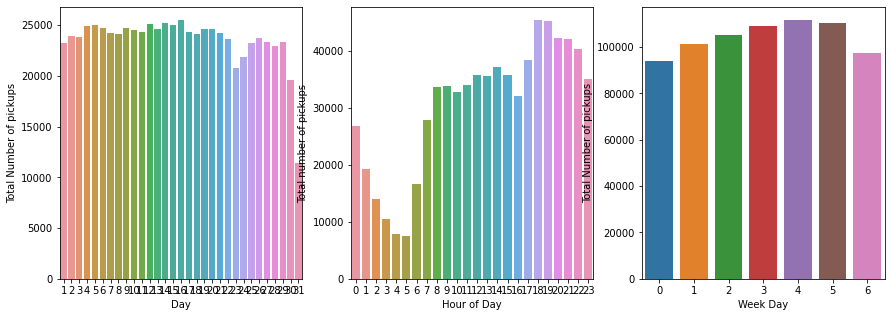

In [ ]:
# extracting more features from the datetime variable

df['pickup_day'] = df['pickup_datetime'].dt.day
df['pickup_hour'] = df['pickup_datetime'].dt.hour
df['pickup_weekday'] = df['pickup_datetime'].dt.weekday


# Datetime features
plt.figure(figsize=(20, 5))

# Passenger Count
plt.subplot(141)
sns.countplot(df['pickup_day'])
plt.xlabel('Day')
plt.ylabel('Total Number of pickups')

# vendor_id
plt.subplot(142)
sns.countplot(df['pickup_hour'])
plt.xlabel('Hour of Day')
plt.ylabel('Total number of pickups')

# Passenger Count
plt.subplot(143)
sns.countplot(df['pickup_weekday'])
plt.xlabel('Week Day')
plt.ylabel('Total Number of pickups')

Inferences:
1. Weekdays have high trips compare to Saturday(6) and Sunday(0).

2. Trip is on peak on Thursday(4).

3. Trips are very low in early morning, while very high in the late evening hour in the day.

4. first week and second week of the month have more trips

We can draw powerful insights from these extracted features. So, the same will be done for dropoff_datetime feature

In [ ]:
df['dropoff_day'] = df['dropoff_datetime'].dt.day
df['dropoff_hour'] = df['dropoff_datetime'].dt.hour
df['dropoff_weekday'] = df['dropoff_datetime'].dt.weekday

In [ ]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,store_and_fwd_flag_encoded,pickup_day,pickup_hour,pickup_weekday,dropoff_day,dropoff_hour,dropoff_weekday
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400,0,29,16,0,29,16,0
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,0,11,23,4,11,23,4
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,0,21,17,6,21,18,6
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,0,5,9,1,5,10,1
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848,0,17,6,2,17,6,2


Feature extraction from logitude and latitude columns.

The given format is of geographical coordinates from which we can't get any insights. So, we will get the distance from these coordinates.

In [ ]:
def calculate_distance(pickup_lat, pickup_long, dropoff_lat, dropoff_long):
 
 start_coords = (pickup_lat, pickup_long)
 stop_coords = (dropoff_lat, dropoff_long)
 
 return great_circle(start_coords,stop_coords).km

In [ ]:
df['distance'] = df.apply(lambda x: calculate_distance(x['pickup_latitude'], 
                                                       x['pickup_longitude'],
                                                       x['dropoff_latitude'],
                                                       x['dropoff_longitude']), axis=1)

In [ ]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,store_and_fwd_flag_encoded,pickup_day,pickup_hour,pickup_weekday,dropoff_day,dropoff_hour,dropoff_weekday,distance
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400,0,29,16,0,29,16,0,1.199074
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,0,11,23,4,11,23,4,4.129117
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,0,21,17,6,21,18,6,7.250763
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,0,5,9,1,5,10,1,2.361101
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848,0,17,6,2,17,6,2,4.328540


Looking for anomalies, if any

In [ ]:
df['distance'].value_counts()

0.000000    2901
0.000424      23
0.000424      20
0.000424      19
0.001273      11
            ... 
0.809168       1
5.589764       1
2.954873       1
6.670588       1
4.134754       1
Name: distance, Length: 726244, dtype: int64

We can see, there are 2893 records with distance travelled as 0.

feature - passenger_count

Text(0, 0.5, 'Frequency')

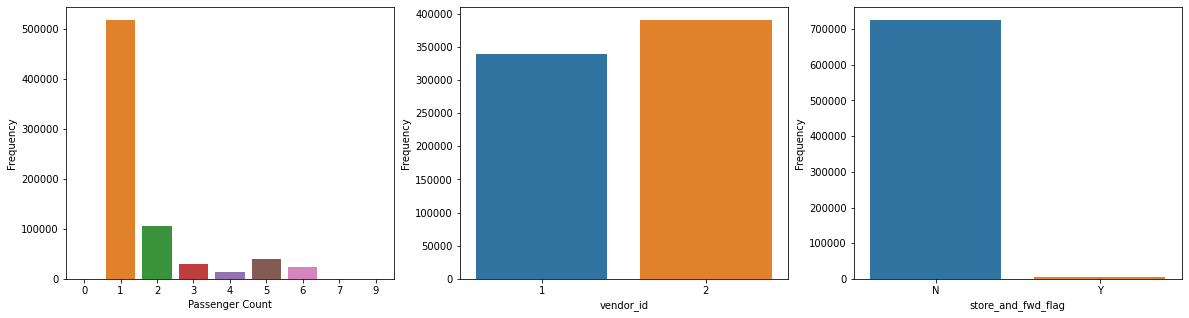

In [ ]:
# Binary Features
plt.figure(figsize=(20, 5))

# Passenger Count
plt.subplot(131)
sns.countplot(df['passenger_count'])
plt.xlabel('Passenger Count')
plt.ylabel('Frequency')

# vendor_id
plt.subplot(132)
sns.countplot(df['vendor_id'])
plt.xlabel('vendor_id')
plt.ylabel('Frequency')

# store_and_fwd_flag
plt.subplot(133)
sns.countplot(df['store_and_fwd_flag'])
plt.xlabel('store_and_fwd_flag')
plt.ylabel('Frequency')

Inferences:

1. Most trips consists rides with 1 passenger only.
2. Vendor 2 has more trips, compared to vendor 1
3. The value with Y is very low in the store_and_fwd_flag variable. This suggests that almost no storing took place

feature engineering for passenger_count

In [ ]:
df['passenger_count'].value_counts()

1    517415
2    105097
5     38926
3     29692
6     24107
4     14050
0        33
9         1
7         1
Name: passenger_count, dtype: int64

From the graph and the data above, we can see there are extremely low values with passenger_count 0, 7 and 9. So, we will remove these records

In [ ]:
df=df[df['passenger_count']!=0]
df=df[df['passenger_count']<=6]

In [ ]:
# checking the passenger_count value distribution again

df['passenger_count'].value_counts()

1    517415
2    105097
5     38926
3     29692
6     24107
4     14050
Name: passenger_count, dtype: int64

In [ ]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,store_and_fwd_flag_encoded,pickup_day,pickup_hour,pickup_weekday,dropoff_day,dropoff_hour,dropoff_weekday,distance
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400,0,29,16,0,29,16,0,1.199074
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,0,11,23,4,11,23,4,4.129117
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,0,21,17,6,21,18,6,7.250763
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,0,5,9,1,5,10,1,2.361101
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848,0,17,6,2,17,6,2,4.328540


The 'id' variable

In [ ]:
#checking the number of unique values in id variable

df['id'].nunique()

729287

In [ ]:
# checking the shape of the dataset now

df.shape

(729287, 19)

The number of unique values in id variable is exactly same to the number of records, and so we cannot infer any insight from the variable that can help build our model. So, we will remove this column.

**target variable - trip duration**

exploring the target variable

In [ ]:
# trip duration in hour
df['trip_duration'].describe()/3600

count    202.579722
mean       0.264515
std        1.073531
min        0.000278
25%        0.110278
50%        0.184167
75%        0.298611
max      538.815556
Name: trip_duration, dtype: float64

The maximum trip duration is of 538 hours which seems to be an outlier. To help the model make more accurate prediction, we need to log transform this feature.

In [ ]:
# trip duration in hours
df['trip_duration_in_hour'] = df['trip_duration'].apply(lambda x : x/3600)

In [ ]:
# removing outliers considering trips are not supposed to exceed a day(24 hours)
df = df[df['trip_duration_in_hour']<=24]

In [ ]:
df['trip_duration_in_hour'].min(), df['trip_duration_in_hour'].max()

(0.0002777777777777778, 23.9975)

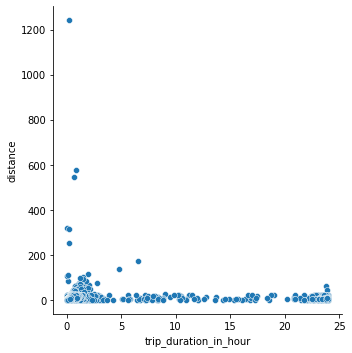

In [ ]:
sns.relplot(y=df['distance'],x='trip_duration_in_hour',data=df)

Some trips have high distance for 0 trip duration, while some have high trip duration for 0 distance

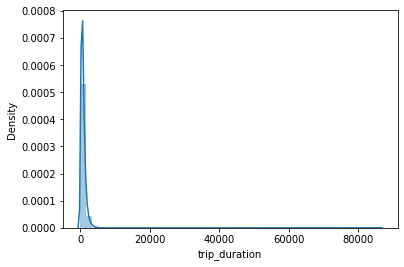

In [ ]:
# before log transform
sns.distplot(df['trip_duration'])
plt.show()

Let's normalize the trip_duration column to remove this high skewness

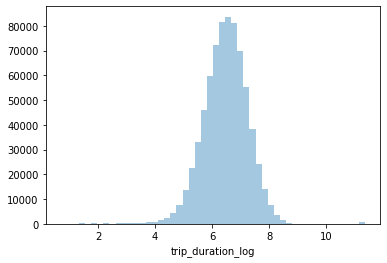

In [ ]:
# after log transform of trip duration in seconds

df['trip_duration_log'] = np.log(df['trip_duration'].values + 1)
sns.distplot(df['trip_duration_log'], kde = False)
plt.show()

Since, all the feature engineering steps are done now, we can remove the extra columns that are not needed anymore

We have seen some anomalies with trip duration and distance. Let's try to remove these outliers

In [ ]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,store_and_fwd_flag_encoded,pickup_day,pickup_hour,pickup_weekday,dropoff_day,dropoff_hour,dropoff_weekday,distance,trip_duration_in_hour,trip_duration_log
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400,0,29,16,0,29,16,0,1.199074,0.111111,5.993961
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,0,11,23,4,11,23,4,4.129117,0.305556,7.003974
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,0,21,17,6,21,18,6,7.250763,0.454167,7.400010
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,0,5,9,1,5,10,1,2.361101,0.316944,7.040536
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848,0,17,6,2,17,6,2,4.328540,0.235556,6.744059


In [ ]:
df1 = df.drop(columns=['id', 'pickup_datetime', 'dropoff_datetime', 'pickup_longitude',	'pickup_latitude',	
                       'dropoff_longitude',	'dropoff_latitude',	'store_and_fwd_flag',	'trip_duration', 
                       'trip_duration_in_hour'])

correlation heatmap

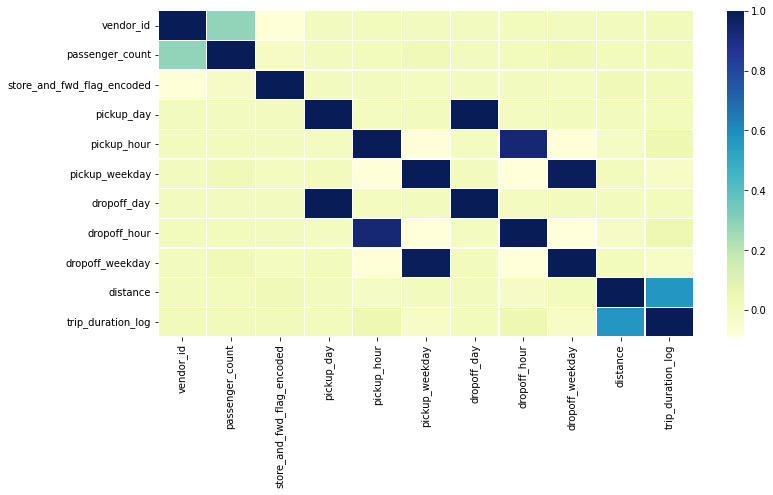

In [ ]:
# checking the correlation among all features

plt.figure(figsize=(12, 6))
corr = df1.corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
                 linewidths=.2, cmap="YlGnBu")

In [ ]:
df1.head(2)

,vendor_id,passenger_count,store_and_fwd_flag_encoded,pickup_day,pickup_hour,pickup_weekday,dropoff_day,dropoff_hour,dropoff_weekday,distance,trip_duration_log
0,2,1,0,29,16,0,29,16,0,1.199074,5.993961
1,1,2,0,11,23,4,11,23,4,4.129117,7.003974


In [ ]:
X = df1.drop('trip_duration_log', axis=1)
y = df1['trip_duration_log']

**Scaling the data**

In [ ]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(X)

X = pd.DataFrame(x_scaled, columns=X.columns)

# Basic Predictive Modeling

Choose the most suitable evaluation metric and state why you chose it.


This is a regression problem, since we have to predict discrete value, i.e., our target variable - trip duration.

We have a lot of options to choose as evaluation metric such as, Mean Absolute Error, Mean Squared Error, Root Mean Squared Error, Root Mean Squared log error and R-squared

**Chosen evalutation metric - Root Mean Squared Error (RMSE)**

Mean squared error states that finding the squared difference between actual and predicted value.
RMSE is a simple square root of mean squared error.

RMSE is a very simple metric to be used for evaluation. Since, we will be comparing our models and we will explicitly create a benchmark model as a baseline, RMSE will easy to compare these different models. Lower, the value of RMSE, better the model. Also, it will be used for getting the elbow curve.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### Benchmark model

In [ ]:
# creating train and test set for benchmark model

benchmark_train = pd.concat([X_train, y_train], axis=1, join="inner")
benchmark_test = pd.concat([X_test, y_test], axis=1, join="inner")

In [ ]:
benchmark_train.head(3)

,vendor_id,passenger_count,store_and_fwd_flag_encoded,pickup_day,pickup_hour,pickup_weekday,dropoff_day,dropoff_hour,dropoff_weekday,distance,trip_duration_log
377868,0.0,0.0,0.0,0.333333,0.260870,0.000000,0.333333,0.260870,0.000000,0.000696,5.697093
71049,1.0,0.2,0.0,0.133333,0.391304,0.833333,0.133333,0.391304,0.833333,0.001610,6.786717
189296,1.0,0.0,0.0,0.633333,0.434783,0.333333,0.633333,0.434783,0.333333,0.003725,7.856707


In [ ]:
benchmark_test.head(3)

,vendor_id,passenger_count,store_and_fwd_flag_encoded,pickup_day,pickup_hour,pickup_weekday,dropoff_day,dropoff_hour,dropoff_weekday,distance,trip_duration_log
76711,0.0,0.0,0.0,0.566667,0.869565,0.000000,0.566667,0.869565,0.000000,0.003029,8.104401
293155,0.0,0.2,0.0,0.533333,0.739130,1.000000,0.533333,0.739130,1.000000,0.001234,6.774224
223830,1.0,0.0,0.0,0.366667,1.000000,0.666667,0.366667,1.000000,0.666667,0.001090,5.068904


In [ ]:
# the predicted value here is substituted with the mean of target"

benchmark_test['simple_mean'] = benchmark_train['trip_duration_log'].mean()

In [ ]:
# error in simple mean model

error = sqrt(mean_squared_error(benchmark_test['trip_duration_log'], benchmark_test['simple_mean']))

print("r-squared score of simple mean model: ", error)

r-squared score of simple mean model:  0.7978477147493098


### K-NN model

In [ ]:
knnr = KNeighborsRegressor(n_neighbors=5)
knnr.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [ ]:
y_pred = knnr.predict(X_test)

error = sqrt(mean_squared_error(y_test, y_pred))

print("RMSE of knn model: ", error)

RMSE of knn model:  0.5661099654854879


**Elbow curve to determine the best value of k**

In [ ]:
def elbow(k):
  test = []

  for i in k:
    reg = KNeighborsRegressor(n_neighbors=i)
    reg.fit(X_train, y_train)

    tmp_pred = reg.predict(X_test)
    temp_error = sqrt(mean_squared_error(tmp_pred, y_test))
    test.append(temp_error)

  return test

In [ ]:
k = range(1, 10)

In [ ]:
test = elbow(k)

Text(0.5, 1.0, 'Elbow curve for test')

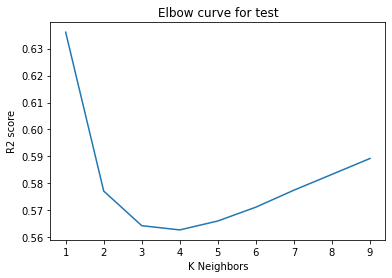

In [ ]:
# plotting the curve

plt.plot(k, test)
plt.xlabel('K Neighbors')
plt.ylabel('RMSE')
plt.title('Elbow curve for test')

So, the lowest error occurs when k = 4

In [ ]:
# re-checking the error after changing n_neighbors to 4

knnr = KNeighborsRegressor(n_neighbors=4)
knnr.fit(X_train, y_train)

RMSE of knn model:  0.5627957797547175


test score

In [ ]:
y_pred = knnr.predict(X_test)

knn_test_rmse = sqrt(mean_squared_error(y_test, y_pred))

print("RMSE of knn model: ", knn_test_rmse)

RMSE of knn model:  0.5627957797547175


train score

In [ ]:
y_pred = knnr.predict(X_train)

knn_train_rmse = sqrt(mean_squared_error(y_train, y_pred))

print("RMSE of knn model: ", knn_train_rmse)

RMSE of knn model:  0.4225747103603383


### linear model

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

test score

In [ ]:
y_pred = lr.predict(X_test)

lm_test_rmse = sqrt(mean_squared_error(y_test, y_pred))
print("RMSE of linear regressor model: ", lm_test_rmse)

RMSE of linear regressor model:  0.6340940147050883


train score

In [ ]:
y_pred = lr.predict(X_train)

lm_train_rmse = sqrt(mean_squared_error(y_train, y_pred))

print("RMSE of linear regressor model: ", lm_train_rmse)

RMSE of linear regressor model:  0.6594541143088032


### Decision tree model

In [ ]:
dtr = DecisionTreeRegressor(random_state=42)
dtr.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

test score

In [ ]:
y_pred = dtr.predict(X_test)

dtr_test_rmse = sqrt(mean_squared_error(y_test, y_pred))
print("RMSE of decision tree regressor model: ", dtr_test_rmse)

RMSE of decision tree regressor model:  0.6231338599769973


train score

In [ ]:
y_pred = dtr.predict(X_train)

dtr_train_rmse = sqrt(mean_squared_error(y_train, y_pred))

print("RMSE of decision tree regressor model: ", dtr_train_rmse)

RMSE of decision tree regressor model:  0.02951876224361523




<table>
  <tr>
    <th>Model</th>
    <th>Train score</th>
    <th>Test score</th>
  </tr>
  <tr>
    <td>K-Nearest Neighbors</td>
    <td>0.422</td>
    <td>0.562</td>
  </tr>
  <tr>
    <td>Linear Regressor</td>
    <td>0.659</td>
    <td>0.634</td>
  </tr>
  <tr>
    <td>Decision Tree Regressor</td>
    <td>0.029</td>
    <td>0.623</td>
  </tr>
</table>


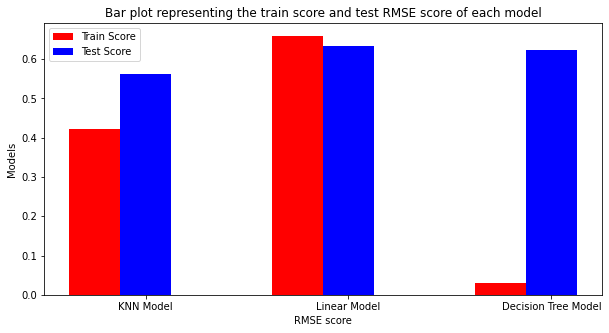

In [ ]:
# Declaring the figure or the plot (y, x) or (width, height)
plt.figure(figsize=[10, 5])

train_scores = [0.422, 0.659, 0.029]
test_scores = [0.562, 0.634, 0.623]

# Passing the parameters to the bar function
# Using X now to align the bars side by side
X = np.arange(len(train_scores))


# Passing the parameters to the bar function, this is the main function which creates the bar plot
# Using X now to align the bars side by side
plt.bar(X, train_scores, color = 'r', width = 0.25)
plt.bar(X + 0.25, test_scores, color = 'b', width = 0.25)

# Creating the legend of the bars in the plot
plt.legend(['Train Score', 'Test Score'])

labels = ['KNN Model', 'Linear Model', 'Decision Tree Model']

# Overiding the x axis with the country names
plt.xticks([i + 0.25 for i in range(3)], labels)

# Giving the tilte for the plot
plt.title("Bar plot representing the train score and test RMSE score of each model")
# Namimg the x and y axis
plt.xlabel('RMSE score')
plt.ylabel('Models')


# Displaying the bar plot
plt.show()